In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import (
    model_selection,
    preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [2]:
import xgboost as xgb
xgr = xgb.XGBRegressor(
    random_state=42, base_score=0.5
)
xgr.fit(bos_X_train, bos_y_train)

[23:27:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [3]:
sample_idx = 5
xgr.predict(bos_X.iloc[[sample_idx]])

array([27.269186], dtype=float32)

In [4]:
import shap
shap.initjs()
exp = shap.TreeExplainer(xgr)
vals = exp.shap_values(bos_X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [5]:
shap.force_plot(
    exp.expected_value,
    vals[sample_idx],
    bos_X.iloc[sample_idx],
)

In [6]:
shap.force_plot(
    exp.expected_value, vals, bos_X
)

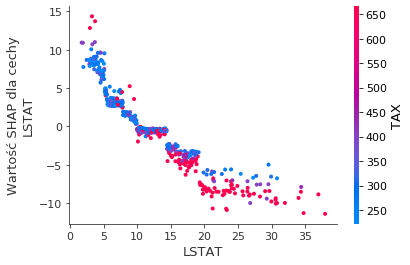

In [17]:
from shap.plots import labels
labels['VALUE_FOR']="Wartość SHAP dla cechy\n%s"
fig, ax = plt.subplots(figsize=(6, 4))
shap.dependence_plot("LSTAT", vals, bos_X, ax=ax)
fig.savefig(
    "images/mlpr_1603.png",
    bbox_inches="tight",
    dpi=300,
)

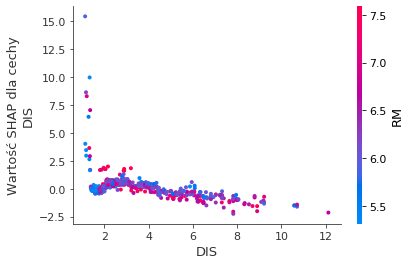

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
shap.dependence_plot(
    "DIS", vals, bos_X, interaction_index="RM", ax=ax
)
fig.savefig(
    "images/mlpr_1604.png",
    bbox_inches="tight",
    dpi=300,
)

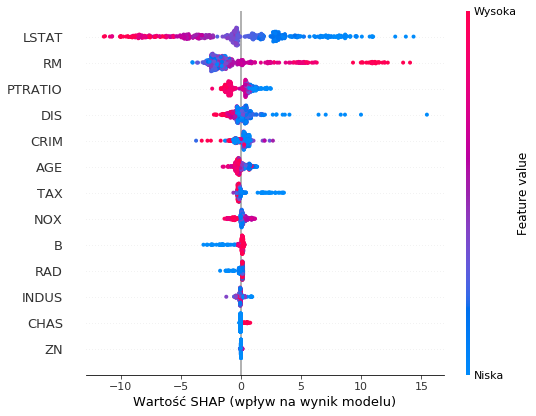

In [20]:
labels['VALUE']="Wartość SHAP (wpływ na wynik modelu)"
labels['FEATURE_VALUE']="Wartość cechy"
labels['FEATURE_VALUE_HIGH']="Wysoka"
labels['FEATURE_VALUE_LOW']="Niska"
fig, ax = plt.subplots(figsize=(6, 4))
shap.summary_plot(vals, bos_X)
fig.savefig(
    "images/mlpr_1605.png",
    bbox_inches="tight",
    dpi=300,
)